In [20]:
import xarray as xr
from dask.distributed import Client
from dask_ml.cluster import KMeans
# import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import regionmask

ModuleNotFoundError: No module named 'regionmask'

In [2]:
client = Client()
client

/home/dyllanjr/anaconda3/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38029 instead
  warnings.warn(


Client Scheduler: tcp://127.0.0.1:36211 Dashboard: http://127.0.0.1:38029/status,Cluster Workers: 4 Cores: 12 Memory: 50.56 GB


In [42]:
ds = xr.open_dataset('era5_79_20_prepared.nc')

In [43]:
ds

<xarray.Dataset>
Dimensions:          (expver: 2, latitude: 129, longitude: 173, time: 42)
Coordinates:
  * longitude        (longitude) float32 -18.5 -18.25 -18.0 ... 24.0 24.25 24.5
  * latitude         (latitude) float32 23.5 23.25 23.0 ... -8.0 -8.25 -8.5
  * expver           (expver) int32 1 5
  * time             (time) int64 1979 1980 1981 1982 ... 2017 2018 2019 2020
Data variables:
    annual_max_t2m   (time, expver, latitude, longitude) float32 ...
    annual_max_tp    (time, expver, latitude, longitude) float32 ...
    annual_mean_t2m  (time, expver, latitude, longitude) float32 ...
    annual_mean_tp   (time, expver, latitude, longitude) float32 ...
    annual_min_t2m   (time, expver, latitude, longitude) float32 ...
    annual_min_tp    (time, expver, latitude, longitude) float32 ...
    sum_max_t2m      (time, expver, latitude, longitude) float32 ...
    sum_max_tp       (time, expver, latitude, longitude) float32 ...
    sum_mean_t2m     (time, expver, latitude, longitude) float32 ...
    sum_mean_tp      (time, expver, latitude, longitude) float32 ...
    sum_min_t2m      (time, expver, latitude, longitude) float32 ...
    sum_min_tp       (time, expver, latitude, longitude) float32 ...
    win_max_t2m      (time, expver, latitude, longitude) float32 ...
    win_max_tp       (time, expver, latitude, longitude) float32 ...
    win_mean_t2m     (time, expver, latitude, longitude) float32 ...
    win_mean_tp      (time, expver, latitude, longitude) float32 ...
    win_min_t2m      (time, expver, latitude, longitude) float32 ...
    win_min_tp       (time, expver, latitude, longitude) float32 ...

In [44]:
df = ds.to_dask_dataframe()
df = df[df.expver == 1]
df = df.drop('expver', axis=1)
t2m_cols = ['annual_max_t2m', 'annual_mean_t2m', 'annual_min_t2m', 'sum_max_t2m', 'sum_mean_t2m', 'sum_min_t2m','win_max_t2m', 'win_mean_t2m', 'win_min_t2m']
#convert to celcius fronm kelvin
for col in t2m_cols:
    df[col] = df[col] - 273.15

In [45]:
df.head()

,latitude,longitude,time,annual_max_t2m,annual_max_tp,annual_mean_t2m,annual_mean_tp,annual_min_t2m,annual_min_tp,sum_max_t2m,...,sum_mean_t2m,sum_mean_tp,sum_min_t2m,sum_min_tp,win_max_t2m,win_max_tp,win_mean_t2m,win_mean_tp,win_min_t2m,win_min_tp
0,23.5,-18.5,1979,22.643585,0.000742,20.610718,0.000144,18.900452,0.000007,22.643585,...,21.120178,0.000044,19.373260,0.000010,21.989746,0.000742,20.101257,0.000244,18.900452,0.000007
1,23.5,-18.5,1980,23.319489,0.000746,20.897034,0.000213,19.004150,0.000011,23.319489,...,21.708923,0.000126,20.403198,0.000011,22.397522,0.000746,20.085114,0.000301,19.004150,0.000080
2,23.5,-18.5,1981,22.910095,0.000208,20.506836,0.000073,17.780792,0.000007,22.910095,...,21.030334,0.000043,18.963318,0.000007,22.246033,0.000208,19.983307,0.000104,17.780792,0.000023
3,23.5,-18.5,1982,22.265900,0.000242,20.504944,0.000070,18.704346,0.000010,22.265900,...,21.079468,0.000041,19.314697,0.000010,22.200348,0.000242,19.930481,0.000098,18.704346,0.000042
4,23.5,-18.5,1983,22.986359,0.000332,20.622498,0.000110,18.422272,0.000007,22.986359,...,20.953796,0.000068,19.265259,0.000007,22.913300,0.000332,20.291199,0.000151,18.422272,0.000061


In [90]:
df = df[df.time != 2020]


In [91]:
#largest rice producer
nassawra_state = df[(df.latitude == 8.5) & (df.longitude == 8)].compute()
#largest yam/cassava producer
benue_state = df[(df.latitude == 7) & (df.longitude == 8.5)].compute()
#largest guinea corn producer
kaduna_state = df[(df.latitude == 10.5) & (df.longitude == 7.5)].compute()

In [92]:
nassawra_state.head()

,latitude,longitude,time,annual_max_t2m,annual_max_tp,annual_mean_t2m,annual_mean_tp,annual_min_t2m,annual_min_tp,sum_max_t2m,...,sum_mean_t2m,sum_mean_tp,sum_min_t2m,sum_min_tp,win_max_t2m,win_max_tp,win_mean_t2m,win_mean_tp,win_min_t2m,win_min_tp
440412,8.5,8.0,1979,31.095337,0.007143,27.419708,0.003395,25.219269,9.723008e-06,29.806976,...,26.746460,0.006043,25.219269,0.002584,31.095337,0.002499,28.093018,0.000747,26.389954,9.723008e-06
440413,8.5,8.0,1980,30.789642,0.011274,27.354675,0.004584,24.848541,4.294142e-05,30.352295,...,26.539246,0.007243,24.848541,0.001438,30.789642,0.010377,28.170197,0.001926,25.874176,4.294142e-05
440414,8.5,8.0,1981,30.637604,0.007017,27.114380,0.003054,24.583130,1.134351e-05,30.203491,...,26.359863,0.005488,24.583130,0.002483,30.637604,0.003006,27.868866,0.000619,26.191711,1.134351e-05
440415,8.5,8.0,1982,29.379303,0.008179,27.094971,0.003563,24.894745,4.053116e-06,29.379303,...,26.427368,0.006208,24.894745,0.003273,29.150452,0.003386,27.762512,0.000918,25.551819,4.053116e-06
440416,8.5,8.0,1983,31.462830,0.007330,27.816467,0.002564,25.027985,1.862645e-09,31.462830,...,27.155090,0.004841,25.027985,0.000852,30.755249,0.000824,28.477783,0.000286,25.480896,1.862645e-09


In [93]:
import seaborn as sns

In [94]:
def var_explorer(var, title_var):
#     plt.figure(figsize=(15, 10))
    sns.lineplot(x=nassawra_state.time, y=nassawra_state[var], label='Nassawra')
    sns.lineplot(x=benue_state.time, y=benue_state[var], label='Benue')
    sns.lineplot(x=kaduna_state.time, y=kaduna_state[var], label='Kaduna')
    plt.legend()
    plt.title(f'{title_var} of Major Agricultural Producers in Nigeria')
    plt.ylabel(title_var)
    sns.despine()
    return

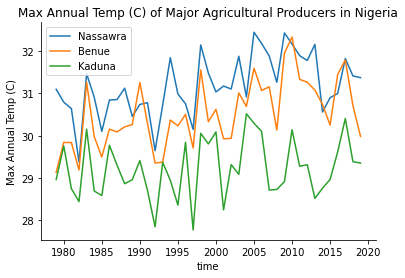

In [95]:
var_explorer('annual_max_t2m', 'Max Annual Temp (C)')

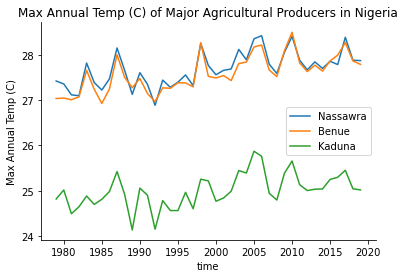

In [96]:
var_explorer('annual_mean_t2m', 'Max Annual Temp (C)')

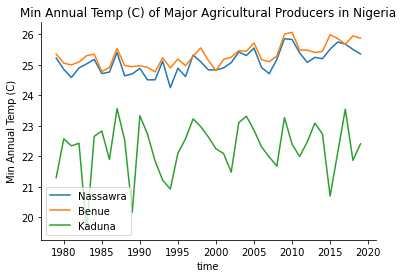

In [97]:
var_explorer('annual_min_t2m', 'Min Annual Temp (C)')

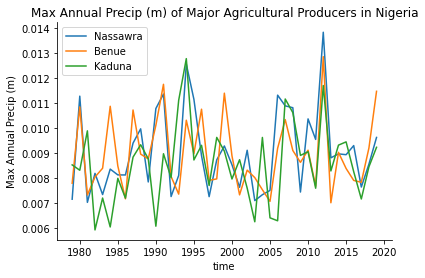

In [98]:
var_explorer('annual_max_tp', 'Max Annual Precip (m)')

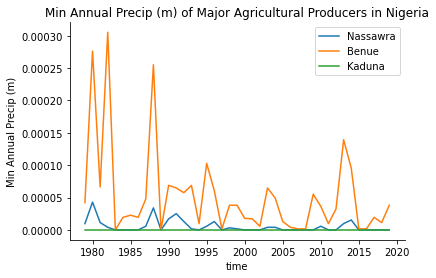

In [99]:
var_explorer('annual_min_tp', 'Min Annual Precip (m)')

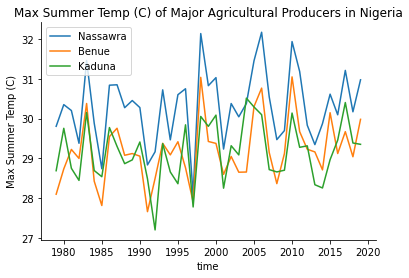

In [100]:
var_explorer('sum_max_t2m', 'Max Summer Temp (C)')

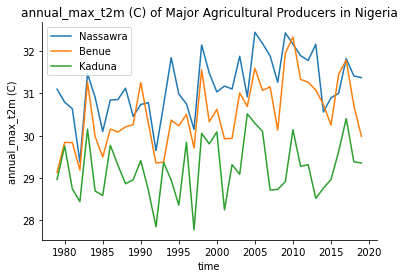

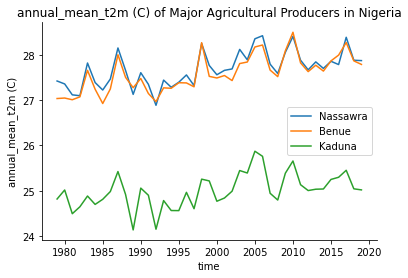

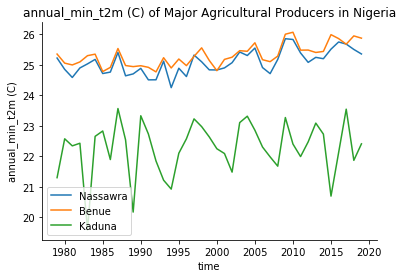

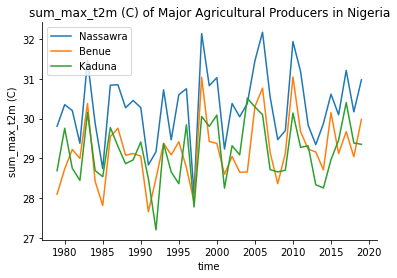

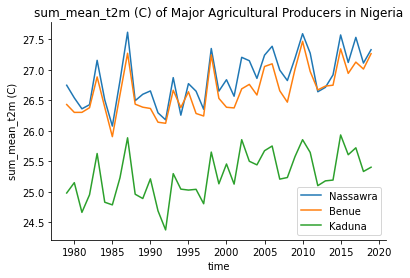

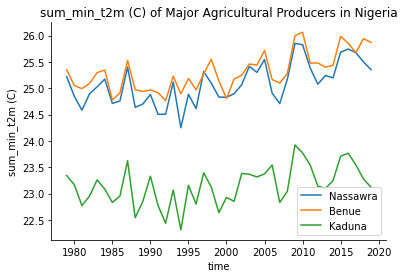

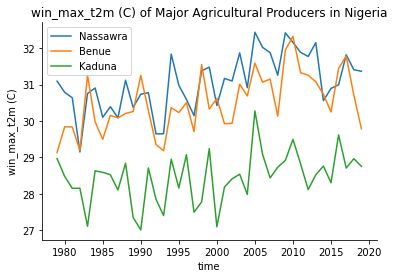

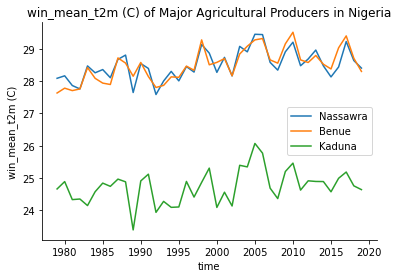

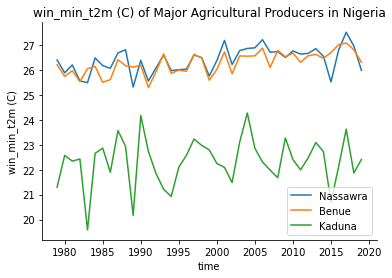

In [101]:
for col in t2m_cols:
    var_explorer(col, f'{col} (C)')
    plt.show()

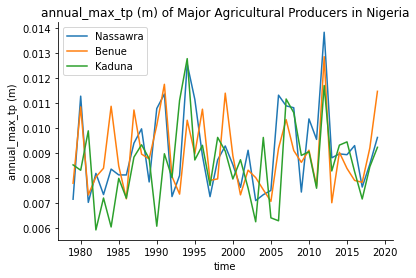

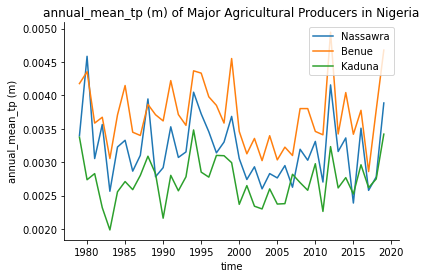

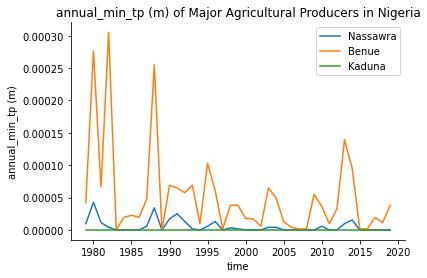

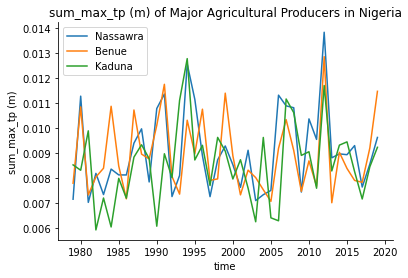

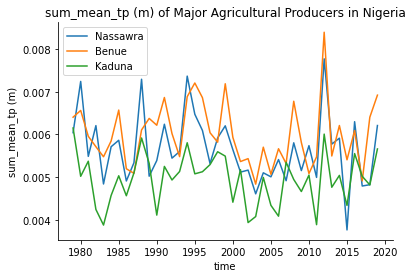

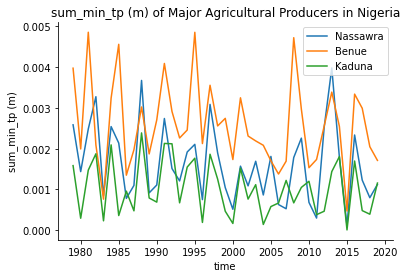

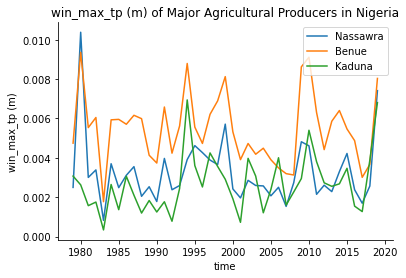

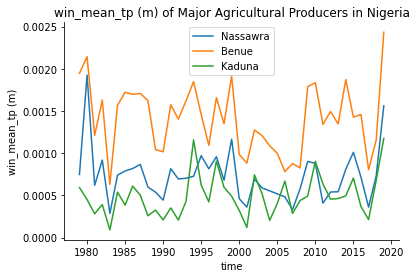

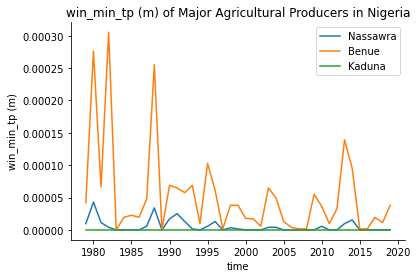

In [102]:
tp_cols = []
for col in df.columns:
    if col not in t2m_cols and col not in ['time', 'latitude', 'longitude']:
        tp_cols.append(col)
for col in tp_cols:
    var_explorer(col, f'{col} (m)')
    plt.show()

In [ ]:
#sum max tp shows a decrease in the maximum precipitation of summer months in the past 5 years
#sum min t2m shows an increase in the past 5 years
#instead of naively considering single points of data, we can take into account entire climatic regions by clustering